# Deep Learning for Function Estimation
### Amir, 2025, NUS SoC ACE

#### We'll try to estimate the quality of red wine samples based on their physical and chemical features
#### We compute and report the mean absolute error, MAE

In [2]:
# CNN version
# Regression Example With wine dataset ...
import pandas as pd
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# mounting the Google drive
#from google.colab import drive

#drive.mount('/content/drive')

# Load the dataset
fp = "sample_data/wine_r2_t.csv"

In [4]:

# load dataset to a Pandas dataframe
dataframe = read_csv(fp)
# copy only values to a numpy n dimensional array, ndarray
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]

print(X.shape)
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)


(1599, 11)
(1599, 11, 1)


In [5]:
print(type(dataset))
print(dataset.shape)
print(dataframe.describe())
print( dataframe.head() )

<class 'numpy.ndarray'>
(1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.0

In [6]:
# define base model, a deep covolutional one
# structure comprisses 2 1d convolution layers with 16 and 12 filters, filters are 3x1
# then maxpooling for downsampling, a fully connected dense layer with 12 neurons
# Droput layer with 20% at the end
#
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv1D(16, 3, activation="relu", input_shape=(11,1)))
    model.add(Conv1D(12, 3, activation="relu"))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add( Dropout(0.2) )
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [7]:
# splitting the train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

[[[ 9.9 ]
  [ 0.54]
  [ 0.45]
  ...
  [ 3.39]
  [ 0.62]
  [ 9.4 ]]

 [[10.8 ]
  [ 0.26]
  [ 0.45]
  ...
  [ 3.13]
  [ 0.54]
  [ 9.6 ]]

 [[ 9.9 ]
  [ 0.35]
  [ 0.55]
  ...
  [ 3.26]
  [ 0.79]
  [10.6 ]]

 ...

 [[ 7.9 ]
  [ 0.57]
  [ 0.31]
  ...
  [ 3.29]
  [ 0.69]
  [ 9.5 ]]

 [[13.  ]
  [ 0.47]
  [ 0.49]
  ...
  [ 3.3 ]
  [ 0.68]
  [12.7 ]]

 [[ 9.8 ]
  [ 0.98]
  [ 0.32]
  ...
  [ 3.25]
  [ 0.48]
  [ 9.4 ]]] [5. 5. 5. ... 6. 6. 5.]


In [16]:
# training the model for 900 epochs and testing the trained model with the training data
# we report the training error
estimator = baseline_model()
estimator.fit(X_train, Y_train, epochs=6000) #, verbose=2)
prediction = estimator.predict(X_train)

train_error =  np.abs(Y_train - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

#errors_900e = {'mean_error': 0.7567545841717962, 'min_error': 1.5735626220703125e-05, 'max_error': 4.68697452545166, 'std_error': 0.5484988882539626}
#errors_1400e = {'mean_error': 0.7770158300452301, 'min_error': 0.00022172927856445312, 'max_error': 4.597951889038086, 'std_error': 0.5743109403743879}
#errors_6000e = {'mean_error': 0.8302297544675866, 'min_error': 0.0005440711975097656, 'max_error': 4.9738874435424805, 'std_error': 0.6178575220360497}
print('\nTraining results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/6000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3754
Epoch 3505/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3768
Epoch 3506/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3583
Epoch 3507/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3767
Epoch 3508/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3663
Epoch 3509/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3778
Epoch 3510/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3725
Epoch 3511/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3585
Epoch 3512/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3870
Epoch 3513/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3405
Epoch 3514/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3796
Epoch 3515/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3736
Epoch 3516/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3753
Epoch 3517/6000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [17]:
# showing the real and predicted quality scores for the training data
df = pd.DataFrame({'Actual': Y_train, 'Predicted': prediction.ravel() })
df1 = df.tail(25)
print(df1)

      Actual  Predicted
1254     6.0   5.669165
1255     6.0   5.228558
1256     5.0   5.228558
1257     5.0   5.470161
1258     6.0   5.228558
1259     5.0   5.228558
1260     5.0   5.650034
1261     5.0   5.332470
1262     6.0   6.092852
1263     6.0   6.211473
1264     5.0   5.228558
1265     5.0   6.344797
1266     5.0   5.518579
1267     4.0   4.626053
1268     5.0   5.228558
1269     6.0   6.010176
1270     6.0   5.548611
1271     6.0   5.752467
1272     6.0   6.095151
1273     5.0   5.285759
1274     5.0   5.228558
1275     5.0   5.228558
1276     6.0   5.228558
1277     6.0   6.087630
1278     5.0   5.228558


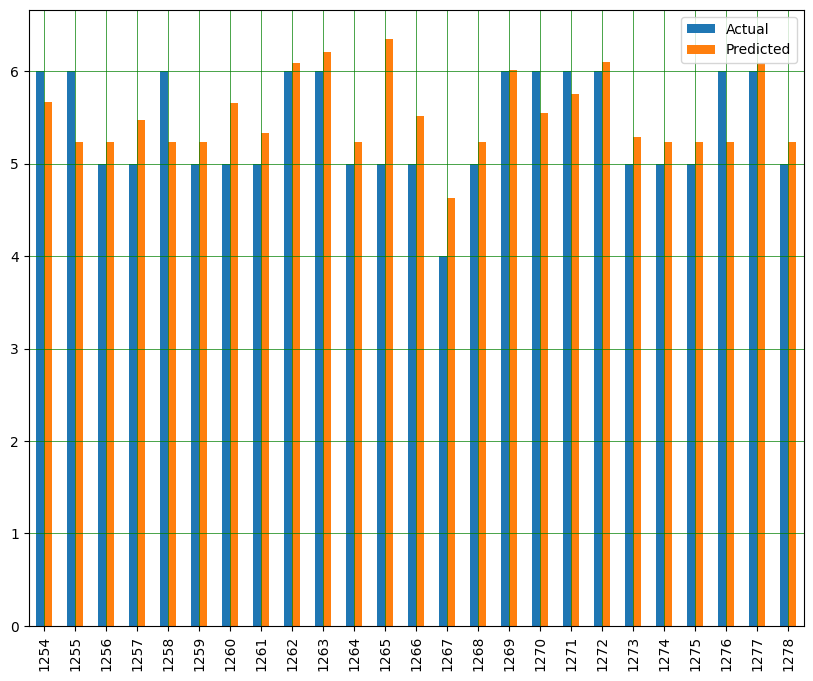

In [18]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

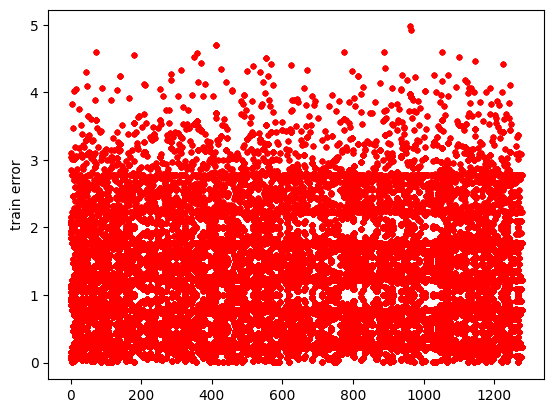

In [19]:
plt.plot(train_error,'r.')
plt.ylabel('train error')
plt.show()

In [20]:
# testing the model with the test data
prediction = estimator.predict(X_test)

test_error =  np.abs(Y_test - prediction)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)
print('\nTesting results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)
#errors_900e = {'mean_error': 0.7007251550443471, 'min_error': 1.5735626220703125e-05, 'max_error': 3.922793388366699, 'std_error': 0.5148064770400209}
#errors_1400e = {'mean_error': 0.7270655311644078, 'min_error': 0.0018200874328613281, 'max_error': 4.023706912994385, 'std_error': 0.5358871572458632}
#errors_1400e = {'mean_error': 0.8038451662939042, 'min_error': 0.0008792877197265625, 'max_error': 4.840633392333984, 'std_error': 0.6056768089286081}

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Testing results:
mean= 0.8038451662939042 
min= 0.0008792877197265625 
max= 4.840633392333984 
std= 0.6056768089286081


In [21]:
# and showing the results
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction.ravel() })
df1 = df.tail(25)
print(df1)

     Actual  Predicted
295     6.0   6.174252
296     6.0   6.372067
297     5.0   6.222091
298     6.0   5.228558
299     5.0   5.296131
300     6.0   6.127336
301     5.0   4.977738
302     6.0   6.253297
303     6.0   5.945136
304     6.0   6.322523
305     6.0   6.044032
306     5.0   5.228558
307     5.0   5.243432
308     6.0   5.497241
309     5.0   5.845413
310     5.0   5.537281
311     6.0   6.830440
312     5.0   5.533539
313     5.0   5.335559
314     5.0   6.495049
315     6.0   6.531878
316     4.0   6.205330
317     5.0   6.467866
318     4.0   5.621001
319     6.0   6.199069


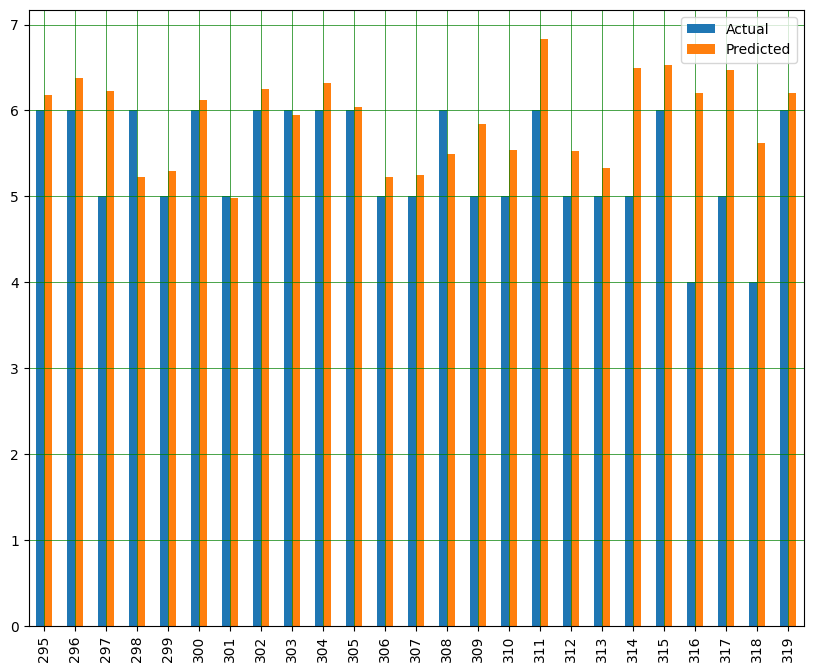

In [22]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

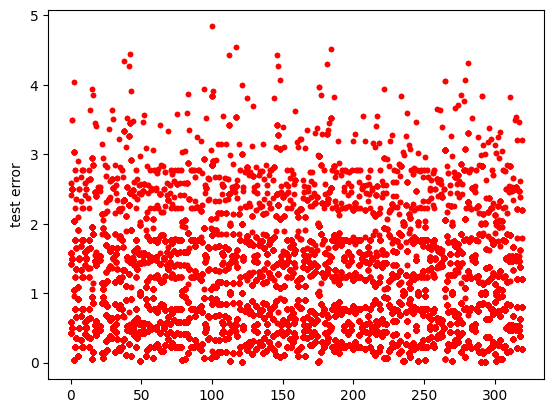

In [23]:
plt.plot(test_error,'r.')
plt.ylabel('test error')
plt.show()

##  Practices
1. train the model for 1400 epochs. what are the training and testing MAE?
2. repeat that with 6000 training epochs. what are the training and testing MAE?
3. move back to 900 training epochs. add two convolutional and one dense layer with the same features of the layers used. what are the training and testing MAE?
4. go for 6000 training epochs. Do you feel any overfitting?
5. set back everything to the original setting, then try to normalize the training and testing features and outputs using standard_scaler. Then see if anything gets better or not. You may use insttructions like what you can see in the next cell.  

#### points:
- use GPU as your runtime type
- if the notebook overflows, change the verbose to 0, e.g. verbose=0 in the training cell.

In [ ]:
'''
# normalization
from sklearn.preprocessing import StandardScaler

# Create scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Standardize X_train and X_test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize Y_train and Y_test (only if y is continuous, e.g., in regression)
y_train_scaled = scaler_y.fit_transform(Y_train.reshape(-1, 1))  # Reshape if needed
y_test_scaled = scaler_y.transform(Y_test.reshape(-1, 1))
'''

'\n# normalization\nfrom sklearn.preprocessing import StandardScaler\n\n# Create scalers\nscaler_X = StandardScaler()\nscaler_y = StandardScaler()\n\n# Standardize X_train and X_test\nX_train_scaled = scaler_X.fit_transform(X_train)\nX_test_scaled = scaler_X.transform(X_test)\n\n# Standardize Y_train and Y_test (only if y is continuous, e.g., in regression)\ny_train_scaled = scaler_y.fit_transform(Y_train.reshape(-1, 1))  # Reshape if needed\ny_test_scaled = scaler_y.transform(Y_test.reshape(-1, 1))\n'